In [1]:
import pandas as pd
import seaborn as sns
import hvplot.pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

In [2]:
loan_data = pd.read_csv("Task 3 and 4_Loan_Data.csv")

# Data Exploration

In [3]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [4]:
loan_data.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [5]:
loan_data.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


<Axes: >

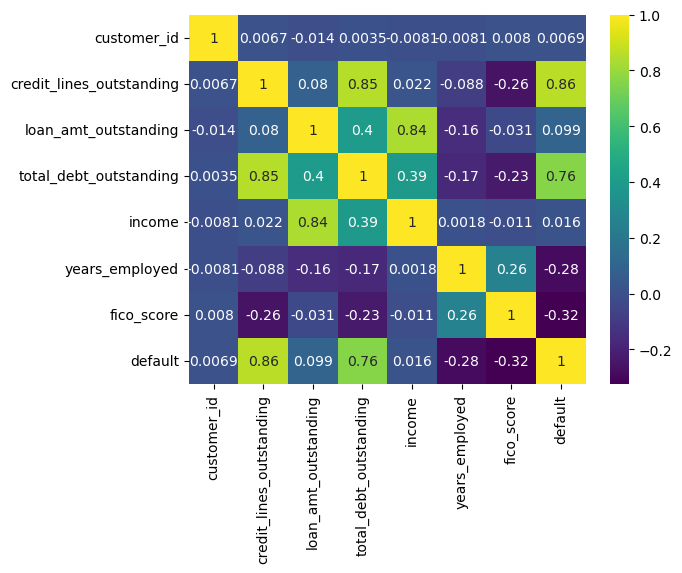

In [6]:
sns.heatmap(loan_data.corr(), annot=True, cmap='viridis')

# Data Preprocessing

In [7]:


## Drop rows with loan_amt_outstanding > total_debt_outstanding 
clean_loan_data = loan_data[loan_data['loan_amt_outstanding']<loan_data['total_debt_outstanding']].reset_index(drop=True)

## Drop column customer_id
clean_loan_data = clean_loan_data.drop('customer_id', axis=1)

## Check if there is missing data
clean_loan_data.isnull().sum()

credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

In [8]:
hist1 = clean_loan_data['loan_amt_outstanding'].hvplot.hist(width=350, height=300, title="loan_amt_outstanding")
hist2 = clean_loan_data['total_debt_outstanding'].hvplot.hist(width=350, height=300, title="total_debt_outstanding")
hist3 = clean_loan_data['income'].hvplot.hist(width=350, height=300, title="income")

hist1+hist2+hist3

:Layout
   .Histogram.I   :Histogram   [loan_amt_outstanding]   (loan_amt_outstanding_count)
   .Histogram.II  :Histogram   [total_debt_outstanding]   (total_debt_outstanding_count)
   .Histogram.III :Histogram   [income]   (income_count)

In [9]:
## Remove outliers

loan_amt_outstanding_q1 = clean_loan_data['loan_amt_outstanding'].quantile(.25)
loan_amt_outstanding_q3 = clean_loan_data['loan_amt_outstanding'].quantile(.75)
IQR = loan_amt_outstanding_q3 - loan_amt_outstanding_q1
clean_loan_data = clean_loan_data[(clean_loan_data['loan_amt_outstanding']<=(loan_amt_outstanding_q3 + 1.5*IQR)) & (clean_loan_data['loan_amt_outstanding']>=(loan_amt_outstanding_q1 - 1.5*IQR))].reset_index(drop = True)

total_debt_outstanding_q1 = clean_loan_data['total_debt_outstanding'].quantile(.25)
total_debt_outstanding_q3 = clean_loan_data['total_debt_outstanding'].quantile(.75)
IQR = total_debt_outstanding_q3 - total_debt_outstanding_q1
clean_loan_data = clean_loan_data[(clean_loan_data['total_debt_outstanding']<=(total_debt_outstanding_q3 + 1.5*IQR)) & (clean_loan_data['total_debt_outstanding']>=(total_debt_outstanding_q1 - 1.5*IQR))].reset_index(drop=True)

income_q1 = clean_loan_data['income'].quantile(.25)
income_q3 = clean_loan_data['income'].quantile(.75)
IQR = income_q3 - income_q1
clean_loan_data = clean_loan_data[(clean_loan_data['income']<=(income_q3 + 1.5*IQR)) & (clean_loan_data['income']>=(income_q1 - 1.5*IQR))].reset_index(drop=True)

In [10]:
clean_loan_data

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,5,1958.928726,8228.752520,26648.43525,2,572,1
1,1,1345.827718,1768.826187,23448.32631,6,631,0
2,0,5376.886873,7189.121298,85529.84591,2,697,0
3,1,3634.057471,7085.980095,68691.57707,6,722,0
4,4,3302.172238,13067.570210,50352.16821,3,545,1
...,...,...,...,...,...,...,...
7534,1,4337.978847,7277.852831,74551.25247,6,728,0
7535,1,2167.752325,4913.969275,51726.62423,6,672,0
7536,1,4146.239304,5458.163525,79969.50521,8,615,0
7537,2,3088.223727,4813.090925,38192.67591,5,596,0


<Axes: >

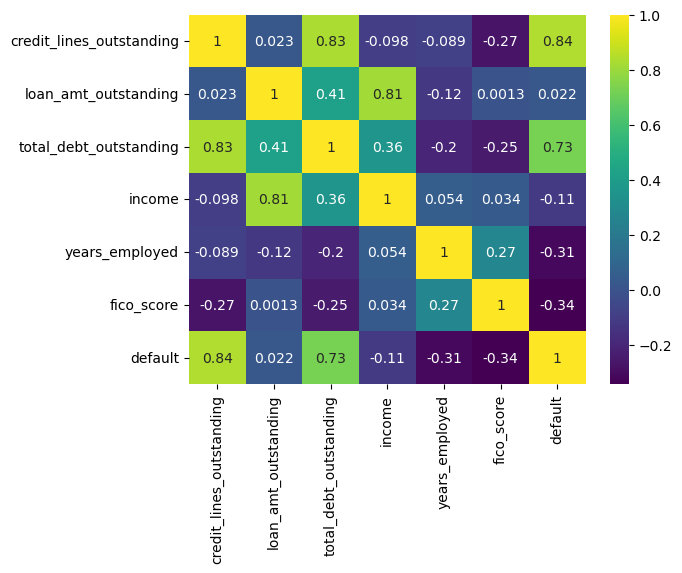

In [11]:
sns.heatmap(clean_loan_data.corr(), annot=True, cmap='viridis')

# Train Test Split

In [12]:
# Split x and y observations 

x = clean_loan_data.drop('default',axis=1)
y = clean_loan_data['default']

In [13]:
# Split train and test set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=123)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [14]:
# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs', max_iter=1000).fit(x_train_scaled, np.ravel(y_train))
clf_logistic.coef_

array([[ 7.55050393,  0.39823416,  3.64975165, -2.81765631, -2.69851525,
        -1.22491786]])

In [15]:
# Create predictions of probability using test data
y_test_preds = clf_logistic.predict_proba(x_test_scaled)

# Create a dataframe for the probabilities of default
y_test_preds_df = pd.DataFrame(y_test_preds[:,1], columns=['prob_default'])

# Reassign loan status based on the threshold
y_test_preds_df['default'] = y_test_preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

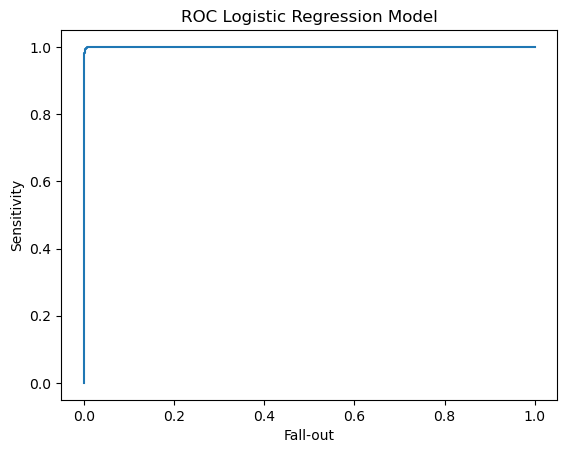

In [16]:
# Model Evaluation

accuracy = clf_logistic.score(x_test_scaled, y_test)
AUC = roc_auc_score(y_test, y_test_preds_df['prob_default'])

fallout, sensitivity, thresholds = roc_curve(y_test, y_test_preds_df['prob_default'])
plt.plot(fallout, sensitivity)
plt.xlabel("Fall-out")
plt.ylabel("Sensitivity")
plt.title("ROC Logistic Regression Model")
plt.show()

In [20]:
accuracy, AUC

(0.9955787781350482, 0.9999429365869854)

In [24]:
confusion_matrix(y_test, y_test_preds_df['default'])

array([[2005,    3],
       [   8,  472]])

# Final Result

In [18]:
# A function that take in the properties of a loan and output the expected loss.

def expected_loss_calculation(credit_lines_outstanding_var, loan_amt_outstanding_var, total_debt_outstanding_var, income_var, years_employed_var, fico_score_var):
    recovery_rate = .1
    loan_properties = pd.DataFrame([[credit_lines_outstanding_var, loan_amt_outstanding_var, total_debt_outstanding_var, income_var, years_employed_var, fico_score_var]],columns=['credit_lines_outstanding','loan_amt_outstanding','total_debt_outstanding','income','years_employed','fico_score'])
    prob_default = clf_logistic.predict_proba(loan_properties)[0][1]
    expected_loss = prob_default * recovery_rate
    print(f'probability of default: {prob_default}, expected loss: {expected_loss}')

In [19]:
# Get user input

credit_lines_outstanding_var = int(input("No. of credit lines oustanding"))
loan_amt_outstanding_var = float(input("Loan amount outstanding"))
total_debt_outstanding_var = float(input("Total Debt Outstanding"))
income_var = float(input("Income"))
years_employed_var = int(input("No. of years employed"))
fico_score_var = int(input("Fico score"))

KeyboardInterrupt: Interrupted by user

In [ ]:
# Generate result

expected_loss_calculation(credit_lines_outstanding_var, loan_amt_outstanding_var, total_debt_outstanding_var, income_var, years_employed_var, fico_score_var)